In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  
!pip install category_encoders

In [3]:
tax=pd.read_csv('Fraud_check.csv')
tax

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
tax_value=[]
for value in tax['TaxableIncome']:
    if value<=30000:
        tax_value.append('Risky')
    else:
        tax_value.append('Good')
tax['tax_value']=tax_value

In [5]:
tax

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,tax_value
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['Undergrad','MaritalStatus','Urban'])
tax1= encoder.fit_transform(tax)

In [8]:
tax1

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,tax_value
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [9]:
tax1=tax1.drop(['TaxableIncome'], axis=1)
tax1

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,tax_value
0,1,1,50047,10,1,Good
1,2,2,134075,18,1,Good
2,1,3,160205,30,1,Good
3,2,1,193264,15,1,Good
4,1,3,27533,28,2,Good
...,...,...,...,...,...,...
595,2,2,39492,7,1,Good
596,2,2,55369,2,1,Good
597,1,2,154058,0,1,Good
598,2,3,180083,17,2,Good


In [10]:
x=tax1.iloc[:, :-1]
y= tax1.iloc[:,-1]

In [11]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=42)

### Building Decision Tree model by Entropy criteria

In [18]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

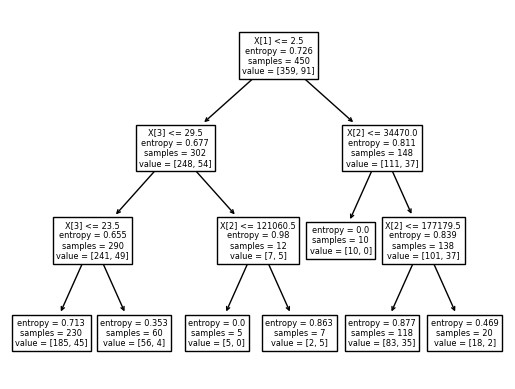

In [19]:
tree.plot_tree(model)
plt.show()

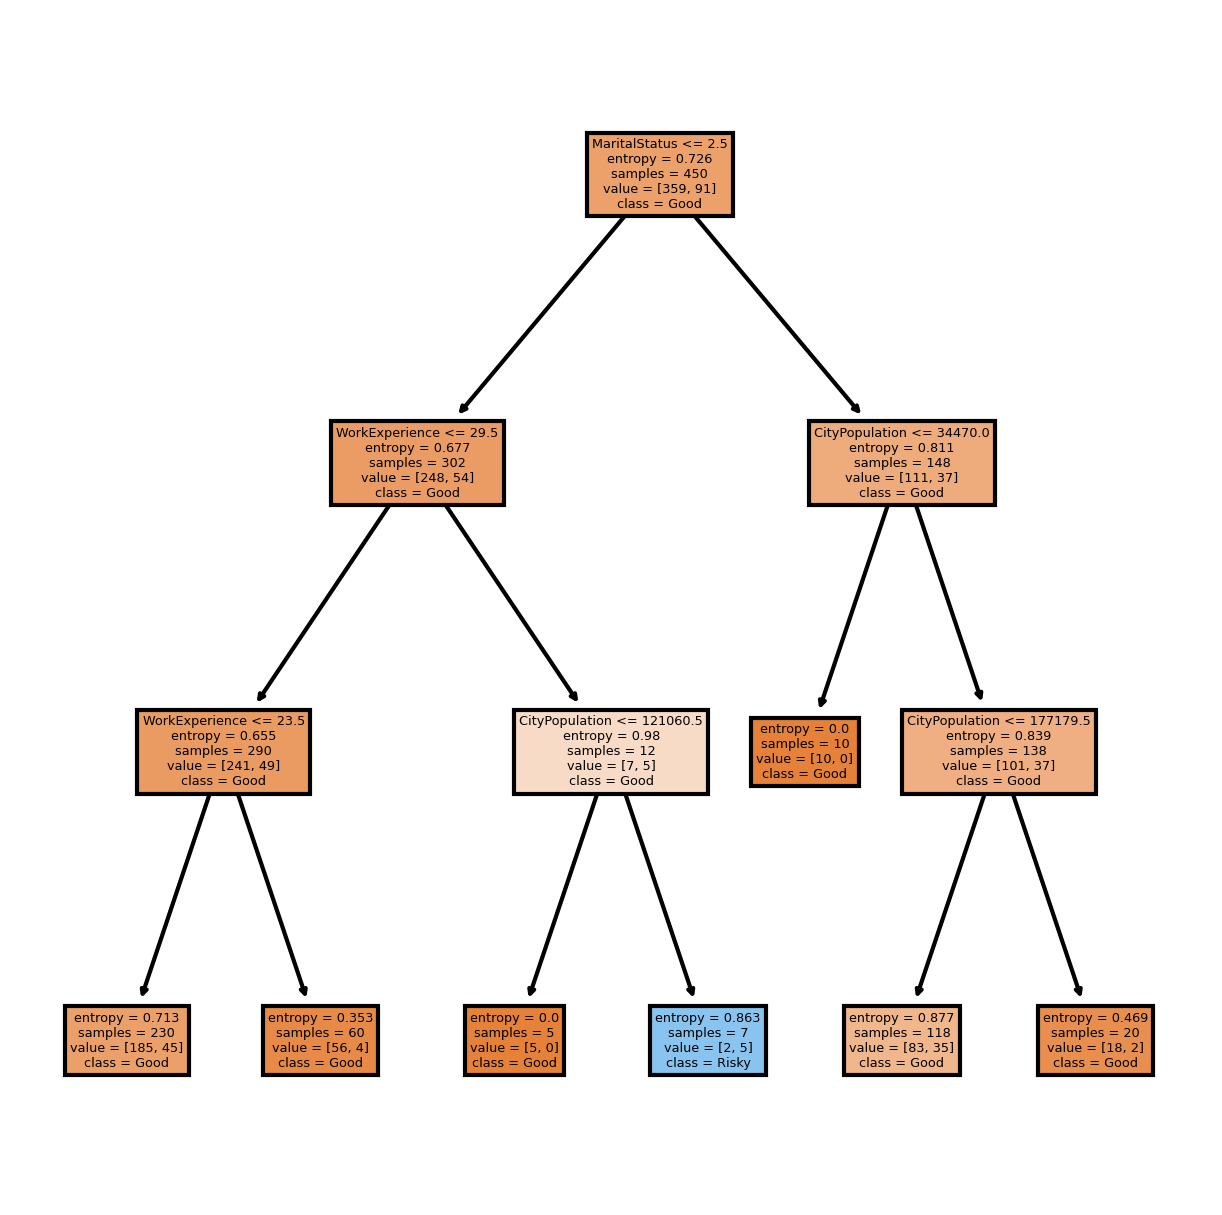

In [20]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
cn=['Good', 'Risky']
fig, axes= plt.subplots(nrows=1,ncols=1, figsize=(5,5), dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True)
plt.show()

In [22]:
text= tree.export_text(model, max_depth=3)
print(text)

|--- feature_1 <= 2.50
|   |--- feature_3 <= 29.50
|   |   |--- feature_3 <= 23.50
|   |   |   |--- class: Good
|   |   |--- feature_3 >  23.50
|   |   |   |--- class: Good
|   |--- feature_3 >  29.50
|   |   |--- feature_2 <= 121060.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  121060.50
|   |   |   |--- class: Risky
|--- feature_1 >  2.50
|   |--- feature_2 <= 34470.00
|   |   |--- class: Good
|   |--- feature_2 >  34470.00
|   |   |--- feature_2 <= 177179.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  177179.50
|   |   |   |--- class: Good



In [23]:
model.feature_importances_

array([0.        , 0.09663964, 0.56829857, 0.33506179, 0.        ])

In [27]:
feature_imp=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

CityPopulation    0.568299
WorkExperience    0.335062
MaritalStatus     0.096640
Undergrad         0.000000
Urban             0.000000
dtype: float64

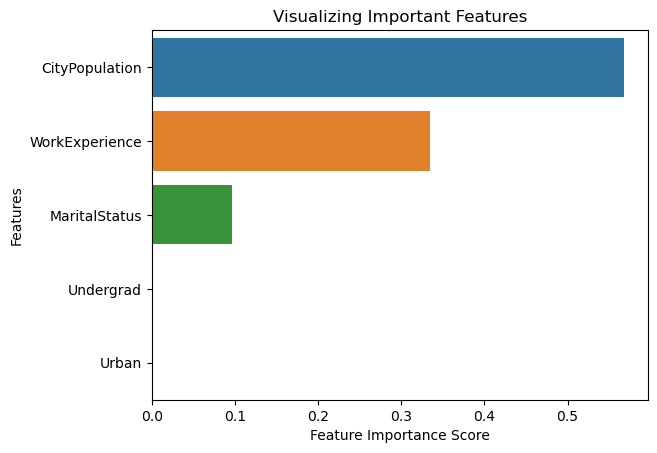

In [28]:
import seaborn as sn
sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [29]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Good     149
Risky      1
dtype: int64

In [30]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [31]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax_value,,
Good,116,1
Risky,33,0


In [32]:
np.mean(preds==y_test)

0.7733333333333333

### Decision Tree by Gini criteria

In [33]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
pred=model_gini.predict(x_test)

In [35]:
np.mean(pred==y_test)

0.7733333333333333

In [36]:
model_gini.feature_importances_

array([0.        , 0.10440711, 0.58475708, 0.3108358 , 0.        ])